In [6]:
import pandas as pd

dataset = 'QM40'

smiles = pd.read_csv(f'data/smiles/{dataset}.csv')

print(smiles.head())

                                              smiles  Internal_E(0K)     HOMO  \
0  CCC(CC)[C@H](C)C(=O)N1C[C@@H]2CC[C@H](O)[C@@H]2C1     -793.132499 -0.22751   
1                   CN(C)C(=O)CNC1(c2ccc(F)cc2F)CCC1     -928.761280 -0.21340   
2           CO[C@@H](C)C(=O)N[C@@H]1CCCOc2c(F)cccc21     -924.647020 -0.22108   
3              CCCC(O)(CCC)CC(=O)N[C@@H](CO)C(C)(C)C     -870.789141 -0.24124   
4         C[C@@H](O)[C@@H]1CCN(C(=O)NCC2CCC(C)CC2)C1     -848.504027 -0.22221   

      LUMO   HL_gap  Polarizability  spatial extent  dipol_mom        ZPE  \
0  0.03541 -0.26292          169.98       5280.3976     4.9267  254.85387   
1 -0.00218 -0.21122          166.41       6945.6138     4.7760  190.50195   
2 -0.00383 -0.21725          165.91       6122.6543     3.1026  191.90159   
3  0.02193 -0.26317          183.08       6913.1679     4.8820  283.26577   
4  0.06360 -0.28581          179.30       7935.7829     3.0173  266.03115   

      rot1     rot2     rot3  Inter_E(298)    Enth

In [13]:
from rdkit.Chem import MolFromSmiles
from rdkit import RDLogger

RDLogger.DisableLog('rdApp.*')

all_sizes = []
for smile in smiles['smiles']:
    mol = MolFromSmiles(smile)
    n_heavy = mol.GetNumHeavyAtoms()
    all_sizes.append(n_heavy)

In [19]:
n = 0
for size in all_sizes:
    if size > 32:
        n += 1
print(n)

25573


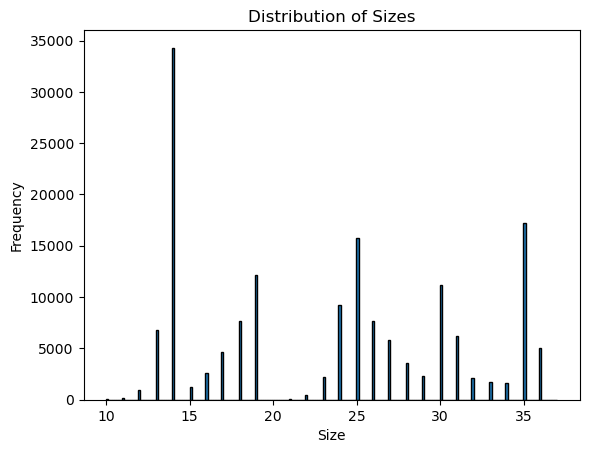

Max size: 37
Min size: 10
Average size: 23.248413662751453


In [14]:
import matplotlib.pyplot as plt

plt.hist(all_sizes, bins=200, edgecolor='black')
plt.title('Distribution of Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

print('Max size:', max(all_sizes))
print('Min size:', min(all_sizes))
print('Average size:', sum(all_sizes) / len(all_sizes))